In [398]:
#ADD 2018 to Data Dict
#adjust MD
#create readme
#ADJUST SORTS TO BE ALPHABETICAL ON FIELDS
#poss rename fields to look fancy
#poss chance rates to % values aka /100 and float
#view corr between states and scores
    #next steps would be obtaining more granular demographics
    #using scores to determine where to make test more avail due to participation rate
    #using scores to determind where to make prep more avail due to ttl scores
        #overall scores along with average household income for area could tell us accessability to prep/
        #how school system is
            #view stat rank in terms of HS rankings nationally
                #corr with GPA view as well

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

<em>The 'College Board' has had incomplete and inconsistent participation and performance on both the SAT and ACT exams. Low participation on exams means less revenue for the company and inconsistent participation rates makes it more challenging to properly allocate resources needed to plan for and administer the exams.</em>

## Executive Summary

Through thorough analysis of the SAT & ACT data as well as independent research, I have concluded that the most effective way to increase participation rate for the SAT is to lobby local governments for its mandate and funding.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [399]:
#Imports:
import numpy as np,pandas as pd,\
matplotlib.pyplot as plt, seaborn as sns

## 2017 Data Import and Cleaning

In [400]:
#Code:
sat2017=pd.read_csv('/Users/christophervolpacchio/GA/project_1/data/sat_2017.csv',skip_blank_lines=True)
act2017=pd.read_csv('/Users/christophervolpacchio/GA/project_1/data/act_2017.csv',skip_blank_lines=True)

In [401]:
#Code:
print(f"\nSAT 2017 Data\n\n{sat2017.head(10)}")
print(f"\n\nACT 2017 Data\n\n{act2017.head(10)}")


SAT 2017 Data

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  


---

   The variables **`sat2017`** and **`act2017`** represent SAT and ACT performance in 2017 by state, respectively. For both sets there are participation rates outlining the rate at which eligible students elect to take the exam as well as average scores for each test's respective sections. There is a ***'National'*** value in the state column for the ACT representing average statistics among states. The SAT dataset does not appear to have this but has something different in a ***Total*** field representing the summation of section scores by state.

---

In [402]:
print(f"\nSAT 2017 Dataset\n")
print(sat2017.info())
print(f"\n\nACT 2017 Dataset\n")
print(act2017.info())


SAT 2017 Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


ACT 2017 Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null   

In [403]:
#Additional check for empty cells
print(f"\nSAT 2017 Nulls\n\n{sat2017.isnull().sum()}")
print(f"\n\nACT 2017 Nulls\n\n{act2017.isnull().sum()}")


SAT 2017 Nulls

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64


ACT 2017 Nulls

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64


In [404]:
sat = sat2017['State'].nunique()
print('SAT has representation from ' + str(sat) + ' states')
act = act2017['State'].nunique()
print('ACT has representation from ' + str(act) + ' states')

SAT has representation from 51 states
ACT has representation from 52 states


---

    The data does not house any 'null' or empty values. There is also representation of each state within both datasets.

---

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [405]:
print(f"\nSAT 2017 Dataset Descriptive Statistics\n\n{sat2017.describe()}")
print(f"\n\nACT 2017 Dataset Descriptive Statistics\n\n{act2017.describe()}")


SAT 2017 Dataset Descriptive Statistics

       Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000


ACT 2017 Dataset Descriptive Statistics

         English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.55

---

Running <em>"descriptive statistics"</em> on the two datasets allowed me to receive a high-level view of the underlying data. There are no null values (which we had previously determined). There is, however, a callout in the **`sat2017`** dataset in what seems to be an abnormally low 'min' value for the Math section. The score range for each section of the SAT is from 200 to 800 where there is a value of '52' recorded. A placeholder fix will be to enter in the average score of the rest of the states since we cannot accurately infer what the value should have been and as well do not want to throw off the other descriptive statistics.

The standard deviations of each field are in-line with those of the other records as well as the quartiles seeming normal indicating that there may simply be few outlier values. The removal of the enitre record where this erroneous value exists from the datasets does <em>not </em>drastically affect our descriptive statics and removing them would effectively remove representation of the corresponding state. The values do not seem to be erroneous entries and thus hold the same weight that any other record would. For the forementioned reasons it seems a wiser decision to keep the records in-tact.

The only potentially troublesome feature that will need to be resolved is the type-casting of certain fields within each dataset. For consistency measures I will cast all seemingly numerical fields as **`float`** or decimas while fields containing aplha characters will be cast as **`str`** or 'strings'.

---

#### 5. What are your data types? 
Display the data types of each feature. 

In [406]:
print(f'\nSAT 2017 Data Summary\n\n{sat2017.dtypes}')
print(f'\n\nACT 2017 Data Summary\n\n{act2017.dtypes}')


SAT 2017 Data Summary

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


ACT 2017 Data Summary

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [407]:
temp_list=[]

def participation_cast0(n):
    for i in n:
        a=i.strip()
        b=a[:-1]
        c=int(b)
        d=c/100
        temp_list.append(d)
    return temp_list

sat2017['Participation'] = participation_cast0(sat2017['Participation'])

In [408]:
act2017['Participation'].value_counts()

100%    17
29%      5
31%      3
18%      2
73%      2
55%      1
62%      1
21%      1
 60%     1
66%      1
90%      1
65%      1
38%      1
40%      1
75%      1
34%      1
8%       1
45%      1
80%      1
67%      1
23%      1
32%      1
28%      1
84%      1
69%      1
35%      1
98%      1
93%      1
Name: Participation, dtype: int64

In [409]:
temp_list=[]

def participation_cast(n):
    for i in n:
        a=i.strip()
        b=a[:-1]
        c=int(b)
        d=c/100
        temp_list.append(d)
    return temp_list
    
new_participation_section = participation_cast(act2017['Participation'])

In [410]:
act2017['Participation'] = new_participation_section

In [411]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [412]:
#hardcode fix
act2017['Composite'].replace(to_replace='20.2x',value='20.2',inplace=True)
act2017['Composite'].sort_values(ascending=False)

30    25.5
22    25.4
7     25.2
20    24.3
33    24.2
9     24.2
23    24.1
8     24.1
40    24.0
31    23.9
47    23.8
39    23.7
21    23.6
46    23.6
5     22.8
15    22.6
13    22.3
36    22.0
16    21.9
48    21.9
38    21.8
42    21.8
17    21.7
24    21.5
11    21.4
28    21.4
14    21.4
0     21.0
6     20.8
44    20.7
50    20.5
26    20.4
49    20.4
45    20.3
27    20.3
35    20.3
51    20.2
18    20.0
10    19.8
43    19.8
2     19.8
32    19.7
3     19.7
19    19.5
37    19.4
4     19.4
1     19.2
34    19.1
12    19.0
41    18.7
25    18.6
29    17.8
Name: Composite, dtype: object

In [413]:
# #dyn replace fn tbc
# import re

# listt=[]
# def please(n):
#     for i in n:
#         listt.append(re.sub('x','',i))
#     else:
#         print(n)
#     return listt

- Finish your data modifications by making sure the columns are now typed appropriately.

In [414]:
#code
print(f'\nSAT 2017 Datatypes\n\n{sat2017.dtypes}')
print(f'\n\nACT 2017 Datatypes\n\n{act2017.dtypes}')


SAT 2017 Datatypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


ACT 2017 Datatypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


In [415]:
act2017['Composite'].value_counts()

20.3    3
21.4    3
19.8    3
21.9    2
24.1    2
19.4    2
24.2    2
23.6    2
20.4    2
21.8    2
19.7    2
25.4    1
22.3    1
22.8    1
23.9    1
21.0    1
23.8    1
20.0    1
24.0    1
19.5    1
25.5    1
17.8    1
24.3    1
19.2    1
20.2    1
20.7    1
20.8    1
22.0    1
18.6    1
23.7    1
19.1    1
22.6    1
25.2    1
18.7    1
21.5    1
20.5    1
19.0    1
21.7    1
Name: Composite, dtype: int64

In [416]:
temp_list=[]

def composite_cast(n):
    for i in n:
        a=i.strip()
        b=float(a)
        temp_list.append(b)
    return temp_list
     
new_composite_section = composite_cast(act2017['Composite'])

In [417]:
act2017['Composite']=new_composite_section
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [418]:
print(f'\nSAT 2017 Datatypes\n\n{sat2017.dtypes}')
print(f'\n\nACT 2017 Datatypes\n\n{act2017.dtypes}')


SAT 2017 Datatypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


ACT 2017 Datatypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [419]:
cols = {
    'State' :'sat_state',
    'Participation':'sat2017_participation_rate',
    'Evidence-Based Reading and Writing':'sat2017_reading_writing',
    'Math':'sat2017_math',
    'Total':'sat2017_total'
}

sat2017.rename(columns=cols, inplace=True)
print(f'\nSAT 2017\n\n{sat2017.columns}')
cols = {
    'State' :'act_state',
    'Participation':'act2017_participation_rate',
    'English':'act2017_english',
    'Math':'act2017_math',
    'Reading':'act2017_reading',
    'Science':'act2017_science',
    'Composite':'act2017_composite'
}
act2017.rename(columns=cols, inplace=True)
print(f'\n\nACT 2017\n\n{act2017.columns}')


SAT 2017

Index(['sat_state', 'sat2017_participation_rate', 'sat2017_reading_writing',
       'sat2017_math', 'sat2017_total'],
      dtype='object')


ACT 2017

Index(['act_state', 'act2017_participation_rate', 'act2017_english',
       'act2017_math', 'act2017_reading', 'act2017_science',
       'act2017_composite'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat2017|The states that have representatives who have participated in the exams.|
|**sat2017_participation_rate**|*float*|sat2017|The percentage of eligible state representatives completing the SAT in 2017.|
|**sat2017_reading_writing**|*int*|sat2017|The corresponding state's average score on the reading/writing section of the 2017 SAT|
|**sat2017_math**|*int*|sat2017|The corresponding state's average score on the mathematics section of the 2017 SAT.| 
|**sat2017_total**|*int*|sat2017|The corresponding state's average score on the combined reading/writing and mathematics sections of the 2017 SAT.|
|**act2017_participation_rate**|*float*|act2017|The percentage of eligible state representatives completing the ACT in 2017.|
|**act2017_english**|*float*|act2017|The corresponding state's average score on the english section of the 2017 ACT|
|**act2017_math**|*float*|act2017|The corresponding state's average score on the mathematics section of the 2017 ACT|
|**act2017_reading**|*float*|act2017|The corresponding state's average score on the reading section of the 2017 ACT|
|**act2017_science**|*float*|act2017|The corresponding state's average score on the science section of the 2017 ACT|
|**act2017_composite**|*float*|act2017|The corresponding state's average score on the combined english, math, reading and science sections of the 2017 ACT|
|**act2018_composite**|*float*|act2018|The corresponding state's average score on the combined english, math, reading and science sections of the 2018 ACT|
|**act2018_participation_rate**|*float*|act2018|The percentage of eligible state representatives completing the ACT in 2018.|
|**sat2018_participation_rate**|*float*|sat2018|The percentage of eligible state representatives completing the SAT in 2018.|
|**sat2018_reading_writing**|*int*|sat2018|The corresponding state's average score on the reading/writing section of the 2018 SAT|
|**sat2018_math**|*int*|sat2018|The corresponding state's average score on the mathematics section of the 2018 SAT.| 
|**sat2018_total**|*int*|sat2018|The corresponding state's average score on the combined reading/writing and mathematics sections of the 2018 SAT.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [420]:
act2017['act_state'].unique()
#value_counts().sort_values(axis=0,ascending=True)

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [421]:
act2017['act_state'] = act2017[act2017.act_state!='National']
act2017['act_state'].unique()
act2017['act_state'].dropna(inplace=True)
# act2017['act_state'].unique()

In [422]:
act2017=act2017[1:len(act2017)]

In [423]:
act2017.head()

,act_state,act2017_participation_rate,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [424]:
print(f'act2017 has {len(act2017.act_state)} unique states')
print(f'sat2017 has {len(sat2017.sat_state)} unique states')

act2017 has 51 unique states
sat2017 has 51 unique states


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [425]:
#Code:
state_exams = pd.merge(left=sat2017, right = act2017, \
                  left_on = 'sat_state', right_on = 'act_state', \
                       left_index=False, right_index=False)

In [426]:
state_exams.head()

,sat_state,sat2017_participation_rate,sat2017_reading_writing,sat2017_math,sat2017_total,act_state,act2017_participation_rate,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite
0,Alabama,0.05,593,572,1165,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [427]:
state_exams.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [428]:
sat2018=pd.read_csv('../data/sat_2018.csv')
act2018=pd.read_csv('../data/act_2018.csv')

In [429]:
sat2018.dropna(inplace=True)
act2018.dropna(inplace=True)
sat = sat2018['State'].nunique()
print('SAT has representation from ' + str(sat) + ' states')
act = act2018['State'].nunique()
print('ACT has representation from ' + str(act) + ' states')

SAT has representation from 51 states
ACT has representation from 51 states


In [430]:
print(f'\nSAT 2018 Datatypes\n\n{sat2018.dtypes}')
print(f'\n\nACT 2018 Datatypes\n\n{act2018.dtypes}')


SAT 2018 Datatypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


ACT 2018 Datatypes

State             object
Participation     object
Composite        float64
dtype: object


In [431]:
temp_list=[]

def participation_cast(n):
    for i in n:
        a=i.strip()
        b=a[:-1]
        c=int(b)
        d=c/100
        temp_list.append(d)
    return temp_list
    
act_new_participation_section = participation_cast(act2018['Participation'])

In [432]:
act2018['Participation'] = act_new_participation_section

In [433]:
act2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [434]:
#casting fns
temp_list=[]

def participation_cast(n):
    for i in n:
        a=i.strip()
        b=a[:-1]
        c=int(b)
        d=c/100
        temp_list.append(d)
    return temp_list
    
sat_new_participation_section = participation_cast(sat2018['Participation'])

In [435]:
sat2018['Participation'] = sat_new_participation_section

In [437]:
cols = {
    'State' :'sat_state',
    'Participation':'sat2018_participation_rate',
    'Evidence-Based Reading and Writing':'sat2018_reading_writing',
    'Math':'sat2018_math',
    'Total':'sat2018_total'
}
sat2018.rename(columns=cols, inplace=True)
print(f'\nSAT 2018\n\n{sat2018.columns}')

cols = {
    'State' :'act_state',
    'Participation':'act2018_participation_rate',
    'Composite':'act2018_composite'
}
act2018.rename(columns=cols, inplace=True)
print(f'\n\nACT 2018\n\n{act2018.columns}')


SAT 2018

Index(['sat_state', 'sat2018_participation_rate', 'sat2018_reading_writing',
       'sat2018_math', 'sat2018_total'],
      dtype='object')


ACT 2018

Index(['act_state', 'act2018_participation_rate', 'act2018_composite'], dtype='object')


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [438]:
merge1=pd.merge(left=state_exams, right = act2018, \
                  left_on = 'sat_state', right_on = 'act_state', \
                       left_index=False, right_index=False)

In [441]:
scores=pd.merge(left=merge1, right = sat2018, \
                  left_on = 'sat_state', right_on = 'sat_state', \
                       left_index=False, right_index=False)

In [445]:
scores.columns

Index(['sat_state', 'sat2017_participation_rate', 'sat2017_reading_writing',
       'sat2017_math', 'sat2017_total', 'act_state_x',
       'act2017_participation_rate', 'act2017_english', 'act2017_math',
       'act2017_reading', 'act2017_science', 'act2017_composite',
       'act_state_y', 'act2018_participation_rate', 'act2018_composite',
       'sat2018_participation_rate', 'sat2018_reading_writing', 'sat2018_math',
       'sat2018_total'],
      dtype='object')

In [446]:
scores.drop(['act_state_x','act_state_y'], axis=1, inplace=True)
cols = {'sat_state':'state'}
scores.rename(columns=cols, inplace=True)
print(f'\nSAT 2018\n\n{scores.columns}')


SAT 2018

Index(['state', 'sat2017_participation_rate', 'sat2017_reading_writing',
       'sat2017_math', 'sat2017_total', 'act2017_participation_rate',
       'act2017_english', 'act2017_math', 'act2017_reading', 'act2017_science',
       'act2017_composite', 'act2018_participation_rate', 'act2018_composite',
       'sat2018_participation_rate', 'sat2018_reading_writing', 'sat2018_math',
       'sat2018_total'],
      dtype='object')


In [447]:
scores.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [450]:
scores.describe().transpose

<bound method DataFrame.transpose of        sat2017_participation_rate  sat2017_reading_writing  sat2017_math  \
count                   51.000000                51.000000     51.000000   
mean                     0.397059               569.725490    548.235294   
std                      0.351126                44.679784     84.437335   
min                      0.020000               503.000000     52.000000   
25%                      0.040000               533.500000    522.000000   
50%                      0.380000               559.000000    548.000000   
75%                      0.660000               613.000000    599.000000   
max                      1.000000               644.000000    651.000000   

       sat2017_total  act2017_participation_rate  act2017_english  \
count      51.000000                   51.000000        51.000000   
mean     1127.313725                    0.647843        20.927451   
std        90.520382                    0.328063         2.347942   
mi

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [473]:
def stddev(field):
    summation=0
    for _ in field:
        summation+=(_ - np.mean(field))**2
    return ((1/len(field))*summation)**(1/2)

In [476]:
test=[1,2,3]

stddev(test)

0.816496580927726

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [479]:
scores.dtypes

state                          object
sat2017_participation_rate    float64
sat2017_reading_writing         int64
sat2017_math                    int64
sat2017_total                   int64
act2017_participation_rate    float64
act2017_english               float64
act2017_math                  float64
act2017_reading               float64
act2017_science               float64
act2017_composite             float64
act2018_participation_rate    float64
act2018_composite             float64
sat2018_participation_rate    float64
sat2018_reading_writing         int64
sat2018_math                    int64
sat2018_total                   int64
dtype: object

In [482]:
test = scores.drop(['state'], axis=1)
test.head()

,sat2017_participation_rate,sat2017_reading_writing,sat2017_math,sat2017_total,act2017_participation_rate,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,act2018_participation_rate,act2018_composite,sat2018_participation_rate,sat2018_reading_writing,sat2018_math,sat2018_total
0,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,0.06,595,571,1166
1,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.43,562,544,1106
2,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.29,577,572,1149
3,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,0.05,592,576,1169
4,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7,0.60,540,536,1076


,sat2017_participation_rate,sat2017_reading_writing,sat2017_math,sat2017_total,act2017_participation_rate,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,act2018_participation_rate,act2018_composite,sat2018_participation_rate,sat2018_reading_writing,sat2018_math,sat2018_total
0,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,0.06,595,571,1166
1,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.43,562,544,1106
2,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.29,577,572,1149
3,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,0.05,592,576,1169
4,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7,0.60,540,536,1076
5,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,0.30,23.9,1.00,519,506,1025
6,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,0.26,25.6,1.00,535,519,1053
7,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,0.17,23.8,1.00,505,492,998
8,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8,0.66,19.9,0.56,550,549,1099
9,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,21.4,0.53,21.4,0.70,542,522,1064


In [491]:
scores.columns.values

array(['state', 'sat2017_participation_rate', 'sat2017_reading_writing',
       'sat2017_math', 'sat2017_total', 'act2017_participation_rate',
       'act2017_english', 'act2017_math', 'act2017_reading',
       'act2017_science', 'act2017_composite',
       'act2018_participation_rate', 'act2018_composite',
       'sat2018_participation_rate', 'sat2018_reading_writing',
       'sat2018_math', 'sat2018_total'], dtype=object)

In [496]:
score_values = scores.select_dtypes(exclude='object')
test = {k:round(stddev(i),2) for (k,i) in score_values.items()}
test

{'sat2017_participation_rate': 0.35,
 'sat2017_reading_writing': 44.24,
 'sat2017_math': 83.61,
 'sat2017_total': 89.63,
 'act2017_participation_rate': 0.32,
 'act2017_english': 2.32,
 'act2017_math': 1.98,
 'act2017_reading': 2.04,
 'act2017_science': 3.15,
 'act2017_composite': 2.0,
 'act2018_participation_rate': 0.34,
 'act2018_composite': 2.1,
 'sat2018_participation_rate': 0.37,
 'sat2018_reading_writing': 46.66,
 'sat2018_math': 46.72,
 'sat2018_total': 92.27}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [503]:
print(scores.describe().transpose)
np.std(scores['sat2017_total'])

<bound method DataFrame.transpose of        sat2017_participation_rate  sat2017_reading_writing  sat2017_math  \
count                   51.000000                51.000000     51.000000   
mean                     0.397059               569.725490    548.235294   
std                      0.351126                44.679784     84.437335   
min                      0.020000               503.000000     52.000000   
25%                      0.040000               533.500000    522.000000   
50%                      0.380000               559.000000    548.000000   
75%                      0.660000               613.000000    599.000000   
max                      1.000000               644.000000    651.000000   

       sat2017_total  act2017_participation_rate  act2017_english  \
count      51.000000                   51.000000        51.000000   
mean     1127.313725                    0.647843        20.927451   
std        90.520382                    0.328063         2.347942   
mi

89.62853410235164

---

Standard Deviations for each field are congruent through the **`stddev()`** function, **`np.std()`** method & **`scores.describe()`** method

---

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [532]:
print(f"\n2017 SAT Min Part. Rates\n\n{scores[scores['sat2017_participation_rate'] == scores['sat2017_participation_rate'].min()][['state','sat2017_participation_rate']]}")
print(f"\n2018 SAT Min Part. Rates\n\n{scores[scores['sat2018_participation_rate'] == scores['sat2018_participation_rate'].min()][['state','sat2018_participation_rate']]}")


2017 SAT Min Part. Rates

           state  sat2017_participation_rate
14          Iowa                        0.02
24   Mississippi                        0.02
34  North Dakota                        0.02

2018 SAT Min Part. Rates

           state  sat2018_participation_rate
34  North Dakota                        0.02


---

**North Dakota** recorded one of the lowest participation rates for the SAT in both 2017 & 2018. We do not have visibility to any non-integer participation rates so it is not possible to see the YoY growth, depreciation.

---

In [533]:
print(f"\n2017 ACT Min Part. Rates\n\n{scores[scores['act2017_participation_rate'] == scores['act2017_participation_rate'].min()][['state','act2017_participation_rate']]}")
print(f"\n2018 ACT Min Part. Rates\n\n{scores[scores['act2018_participation_rate'] == scores['act2018_participation_rate'].min()][['state','act2018_participation_rate']]}")


2017 ACT Min Part. Rates

    state  act2017_participation_rate
18  Maine                        0.08
19  Maine                        0.08

2018 ACT Min Part. Rates

    state  act2018_participation_rate
18  Maine                        0.07
19  Maine                        0.07


---

**Maine** recorded one of the lowest participation rates for the SAT in both 2017 & 2018. The YoY comparison shows that Maine had recorded ~-1% difference. Through further investigation we can see that a YoY comparison for SAT participation in Maine was ~+5% increasing from an already high ~94% in 2017.

---

In [536]:
print(f"\n2017 SAT Max Part. Rates\n\n{scores[scores['sat2017_participation_rate'] == scores['sat2017_participation_rate'].max()][['state','sat2017_participation_rate']]}")
print(f"\n2018 SAT Max Part. Rates\n\n{scores[scores['sat2018_participation_rate'] == scores['sat2018_participation_rate'].max()][['state','sat2018_participation_rate']]}")


2017 SAT Max Part. Rates

          state  sat2017_participation_rate
6   Connecticut                         1.0
7      Delaware                         1.0
22     Michigan                         1.0

2018 SAT Max Part. Rates

          state  sat2018_participation_rate
5      Colorado                         1.0
6   Connecticut                         1.0
7      Delaware                         1.0
11        Idaho                         1.0
22     Michigan                         1.0


---

**Connecticut, Delaware & Michigan** recorded the highest participation rates for the SAT in both 2017 & 2018. The YoY comparison shows that all three had consistent participation while **Delaware & Idaho** both showed growth.

---

In [553]:
print(f"\n2017 ACT Max Part. Rates\n\n{scores[scores['act2017_participation_rate'] == scores['act2017_participation_rate'].max()][['state','act2017_participation_rate']]}")
print(f"\n2018 ACT Max Part. Rates\n\n{scores[scores['act2018_participation_rate'] == scores['act2018_participation_rate'].max()][['state','act2018_participation_rate']]}")


2017 ACT Max Part. Rates

             state  act2017_participation_rate
0          Alabama                         1.0
3         Arkansas                         1.0
5         Colorado                         1.0
16        Kentucky                         1.0
17       Louisiana                         1.0
23       Minnesota                         1.0
24     Mississippi                         1.0
25        Missouri                         1.0
26         Montana                         1.0
28          Nevada                         1.0
33  North Carolina                         1.0
36        Oklahoma                         1.0
40  South Carolina                         1.0
42       Tennessee                         1.0
44            Utah                         1.0
49       Wisconsin                         1.0
50         Wyoming                         1.0

2018 ACT Max Part. Rates

             state  act2018_participation_rate
0          Alabama                         1.0
3     

---

There are 15+ states with 100% participation on the ACT in both 2017 & 2018.

---

In [ ]:
##more efficient to look at field with YoY change

In [552]:
sat_stats = scores[['state','sat2017_total','sat2018_total' ]].sort_values(by = 'sat2017_total', ascending=False)
print(f'\nSAT Total Scores (sorted by 2017 desc)\n\n{sat_stats}')


SAT Scores (sorted by 2017 Total desc)

             state  sat2017_total  sat2018_total
23       Minnesota           1295           1298
49       Wisconsin           1291           1294
14            Iowa           1275           1265
25        Missouri           1271           1262
15          Kansas           1260           1265
34    North Dakota           1256           1283
27        Nebraska           1253           1252
16        Kentucky           1247           1248
24     Mississippi           1242           1236
44            Utah           1238           1010
50         Wyoming           1230           1257
42       Tennessee           1228           1231
41    South Dakota           1216           1240
3         Arkansas           1208           1169
5         Colorado           1201           1025
17       Louisiana           1198           1210
26         Montana           1196           1198
0          Alabama           1165           1166
35            Ohio          

In [559]:
act_stats = scores[['state','act2017_composite','act2018_composite' ]].sort_values(by = 'act2017_composite', ascending=False)
print(f'\nACT Composite Scores (sorted by 2017 desc)\n\n{act_stats}')


ACT Composite Scores (sorted by 2017 desc)

             state  act2017_composite  act2018_composite
29   New Hampshire               25.5               25.1
21   Massachusetts               25.4               25.5
6      Connecticut               25.2               25.6
19           Maine               24.3               24.0
18           Maine               24.3               24.0
32        New York               24.2               24.5
22        Michigan               24.1               24.2
7         Delaware               24.1               23.8
39    Rhode Island               24.0               24.2
30      New Jersey               23.9               23.7
46        Virginia               23.8               23.9
38    Pennsylvania               23.7               23.5
20        Maryland               23.6               22.5
45         Vermont               23.6               24.1
4       California               22.8               22.7
13         Indiana               22.6      

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

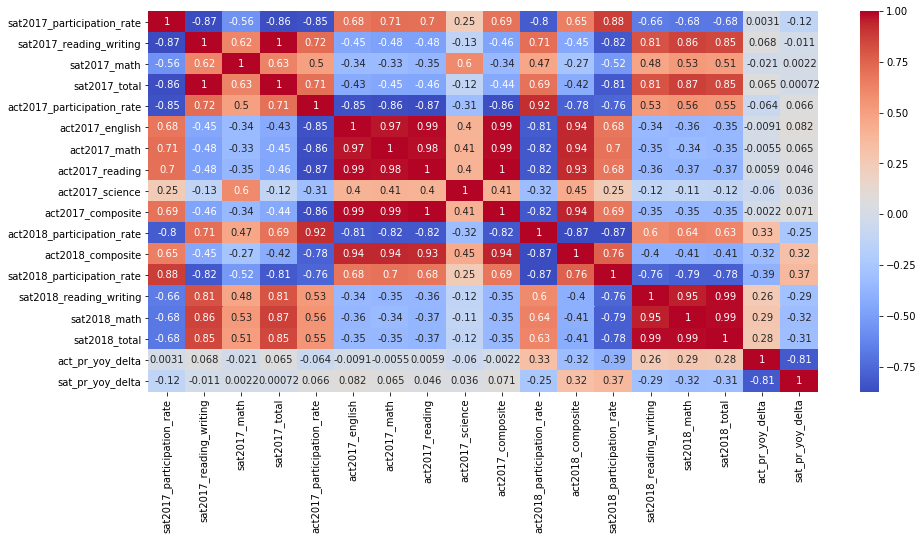

In [712]:
plt.figure(figsize=(15.0,7.0))
sns.heatmap(scores.corr(), annot=True,cmap='coolwarm');

---

There are ***strong*** positive correlations between SAT/ACT 2017 participation rates and rates in 2018. There are also strong negative correlations between participation rates for the SAT in relation to those of the ACT. Both of these things are to be expected as many students will often stick to taking one exam multiple times in order to 'superscore' and achieve their highest possible grade. From a logistic perspective it makes more sense for students to focus on doing well on one test as oppossed to taking both.

---

In [568]:
#
#
##could return abs(max) correlations where fields !=
#
#

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [615]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2)# You'll want to specify your figsize
    plt.title(label=list_of_titles,fontdict = {'fontsize': 40,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        #plt.xlabel([g,h])# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<Figure size 756x2916 with 0 Axes>

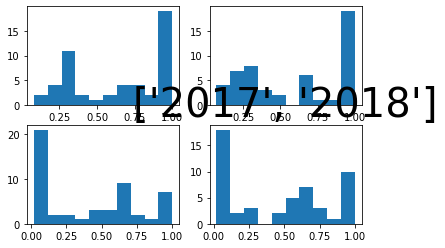

In [616]:
plt.figure(figsize=[10.5,40.5]);
subplot_histograms(scores, ['act2017_participation_rate', 'act2018_participation_rate','sat2017_participation_rate', 'sat2018_participation_rate'], ['2017', '2018'], ['Participation', 'Participation']);

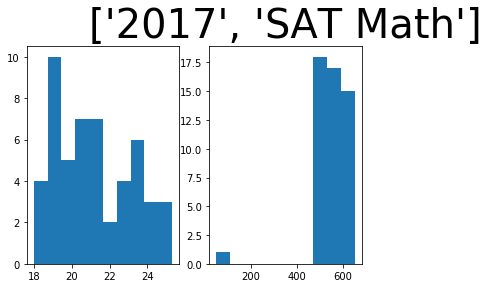

In [617]:
print
subplot_histograms(scores, ['act2017_math', 'sat2017_math'], ['2017', 'SAT Math'], ['Participation', 'Participation']);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.



CORRELATION : -0.33


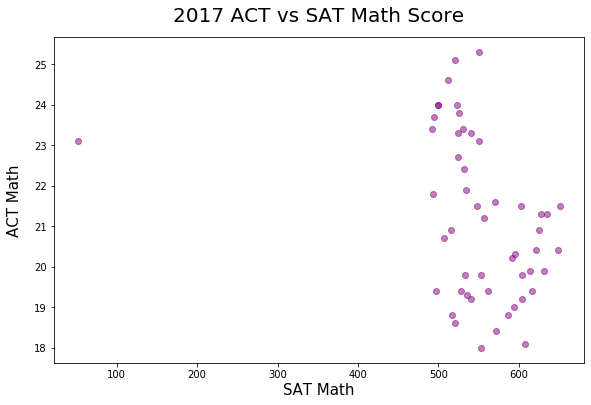

In [651]:
# Code
print(f"\nCORRELATION : {round(scores['sat2017_math'].corr(scores['act2017_math']),2)}")
plt.figure(figsize=(9.5,6))
plt.title('2017 ACT vs SAT Math Score',fontdict = {'fontsize': 20,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},pad=15)
plt.xlabel('SAT Math',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.ylabel('ACT Math',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.scatter(scores['sat2017_math'],scores['act2017_math'],alpha=.5, color='purple');

---

Weak negative correlation between the average scores on the math section of the SAT and ACT in 2017. As one variable increases, the other would decrease.

---


CORRELATION : -0.48


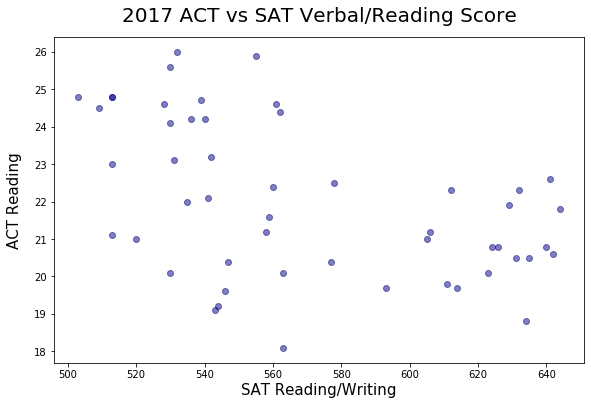

In [658]:
# Code
print(f"\nCORRELATION : {round(scores['sat2017_reading_writing'].corr(scores['act2017_reading']),2)}")
plt.figure(figsize=(9.5,6))
plt.title('2017 ACT vs SAT Verbal/Reading Score',fontdict = {'fontsize': 20,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},pad=15)
plt.xlabel('SAT Reading/Writing',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.ylabel('ACT Reading',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.scatter(scores['sat2017_reading_writing'],scores['act2017_reading'],alpha=.5, color='darkblue');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

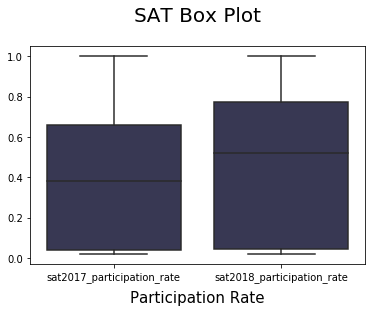

In [685]:
# import numpy as np; np.random.seed(42)
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

# sns.boxplot(x="variable", y="value", data=pd.melt(df))

# plt.show()

# Citation:
# EDA Walkthrough
# Authors: Kiefer Katovich (SF), David Yerrington (SF), Riley Dallas (AUS)

df = pd.DataFrame(data = (scores['sat2017_participation_rate'], scores['sat2018_participation_rate']), columns = ['sat2017_participation_rate', 'sat2018_participation_rate'])

sns.boxplot(df.columns, [scores['sat2017_participation_rate'], scores['sat2018_participation_rate']] ,color = 'darkblue', saturation=.2);
plt.xlabel('Participation Rate',fontdict={'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=20);
plt.title('SAT Box Plot',fontdict={'fontsize': 20,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},pad=25 );

---

SAT average participation rate for states increased ~+10% YoY and became a right-skewed distribution with the majority of the values falling inside the mean.

---

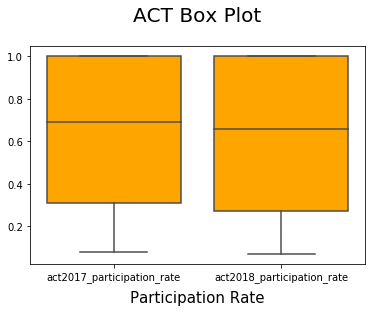

In [688]:
df = pd.DataFrame(data = (scores['act2017_participation_rate'], scores['act2018_participation_rate']), columns = ['act2017_participation_rate', 'act2018_participation_rate'])

sns.boxplot(df.columns, [scores['act2017_participation_rate'], scores['act2018_participation_rate']] ,color = 'orange', saturation=1);
plt.xlabel('Participation Rate',fontdict={'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=20);
plt.title('ACT Box Plot',fontdict={'fontsize': 20,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},pad=25 );

---

ACT average participation rate for states saw a decrease YoY displaying a negative correlation to that of the SAT participation rates. The rate at which we see a derease is much less that the rate of increase that we can see with the SAT showing us the the correlation is not very strong.

---

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [695]:
scores['act_pr_yoy_delta']= (scores['act2018_participation_rate']-scores['act2017_participation_rate'])
scores['sat_pr_yoy_delta']= (scores['sat2018_participation_rate']-scores['sat2017_participation_rate'])

In [696]:
scores.head()

,state,sat2017_participation_rate,sat2017_reading_writing,sat2017_math,sat2017_total,act2017_participation_rate,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,act2018_participation_rate,act2018_composite,sat2018_participation_rate,sat2018_reading_writing,sat2018_math,sat2018_total,act_pr_yoy_delta,sat_pr_yoy_delta
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,1.00,19.1,0.06,595,571,1166,0.00,0.01
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.33,20.8,0.43,562,544,1106,-0.32,0.05
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.66,19.2,0.29,577,572,1149,0.04,-0.01
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,1.00,19.4,0.05,592,576,1169,0.00,0.02
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.27,22.7,0.60,540,536,1076,-0.04,0.07


In [706]:
print(f"\nSAT Max PR Delta\n\n{scores[scores['sat_pr_yoy_delta'] == scores['sat_pr_yoy_delta'].max()][['state','sat_pr_yoy_delta']]}")
print(f"\nACT Max PR Delta\n\n{scores[scores['act_pr_yoy_delta'] == scores['act_pr_yoy_delta'].max()][['state','act_pr_yoy_delta']]}")
print(f"\nSAT Min PR Delta\n\n{scores[scores['sat_pr_yoy_delta'] == scores['sat_pr_yoy_delta'].min()][['state','sat_pr_yoy_delta']]}")
print(f"\nACT Min PR Delta\n\n{scores[scores['act_pr_yoy_delta'] == scores['act_pr_yoy_delta'].min()][['state','act_pr_yoy_delta']]}")



SAT Max PR Delta

       state  sat_pr_yoy_delta
12  Illinois               0.9

ACT Max PR Delta

   state  act_pr_yoy_delta
35  Ohio              0.25

SAT Min PR Delta

     state  sat_pr_yoy_delta
8  Florida             -0.27

ACT Min PR Delta

      state  act_pr_yoy_delta
5  Colorado              -0.7


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [708]:
#Angle is to perform analysis on changes in PR rates for exams in past and to try to find corr/cause of changes
##to regain control of participation rates

#WHAT WE KNOW:
    #SAT changed format from 2 sections to 3 in 2016; year before 2017 data and should be key in our
    #analysis of downstream effects

#three states of interest:
    #1.Illinois --> 90 points higher in PR SAT YoY
        #CB
        #https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
    #2.Colorado --> -70 points lower in PR ACT YoY
        #https://www.testive.com/colorado-sat-change-2017/
    #3.Florida --> -27 points lower in PR YoY; not huge but they have massive population
        #https://www.floridaphoenix.com/blog/florida-scores-drop-on-the-sat-most-teens-tested-not-ready-for-college-classes/#:~:text=The%20group%20tested%20included%20both,to%201017%20the%20year%20before.


CORRELATION : -0.85


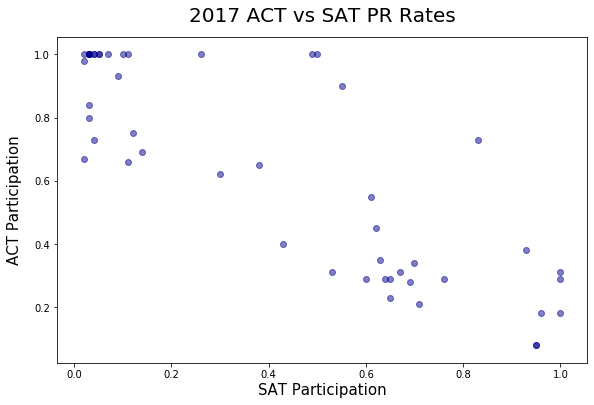

In [709]:
# Code
print(f"\nCORRELATION : {round(scores['sat2017_participation_rate'].corr(scores['act2017_participation_rate']),2)}")
plt.figure(figsize=(9.5,6))
plt.title('2017 ACT vs SAT PR Rates',fontdict = {'fontsize': 20,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},pad=15)
plt.xlabel('SAT Participation',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.ylabel('ACT Participation',fontdict = {'fontsize': 15,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'},labelpad=15)
plt.scatter(scores['sat2017_participation_rate'],scores['act2017_participation_rate'],alpha=.5, color='darkblue');

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

---

SAT put in more resources into some states than it did for others; whether that be money given or partnership to make exam mandatory. We 
can see some effects of those efforts in not only the SAT PR increases but in the ACT PR decreases as well. Scores
are correlated with taking another exam meaning if one student does well on one exam in same year they may take other
as well. This is showing that prep for an SAT course spread out by CB itsself could be useful as those who take both
exams are likely very interested in 'superscoring' and obtaining the best grade possible. If this is in fact the case 
having official prep resources, whether that be books or courses, by CB could influence those students to do well as well. on the other hand, there is a fairly strong negative correlatioin with test results on SAT and participation in the next year meaning that those who dont do very well are going to want to take it again. This further proves our previous point of students really wanting to max out their exams. As a business it may be more lucrative to have students be taking exam multiple times and maybe it makes more ssense to invest more resources into exam availability and presence over the actual prep itself. I reccommend to follow down same path of partnering with states to have exam be mandatory but not before modeling out revenue from taking exams and how long it would take to see profit based on deal that is determined with funds allocated (i.e. Illinois 3yr 14.3 mill mandatory agreement). This seemed to work well in terms of increasing participation but the amount of participants over rate multiplied by what their tests are bringing in is what will help optimize the CB business.

---

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: